## Hw1 (a)

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras import layers

In [2]:
train_data = pd.read_csv("HW1-1.csv")
train_data.head()

,x,y
0,-0.054504,-0.223653
1,0.724703,-0.363040
2,0.269098,-0.383166
3,-0.258074,-0.154802
4,-0.311265,-0.148746


In [3]:
train_features = train_data.copy()
train_labels   = train_features.pop('y')
train_features = np.array(train_features)

In [4]:
model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(1)
])

model.compile(loss = tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam())

In [5]:
model.fit(train_features, train_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 416ms/step - loss: 0.0935
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0836
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0728
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0321
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0220


## Hw1 (b)

In [10]:
import seaborn as sns

<AxesSubplot:>

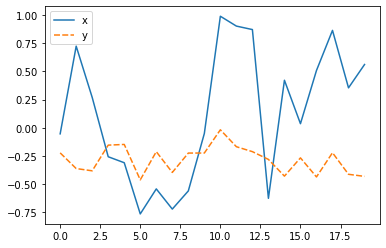

In [18]:
sns.lineplot(data = train_data)

In [3]:
ORDER = 28

# Setup model
model = tf.keras.Sequential([
    layers.Input(shape=(ORDER,)),
    layers.Dense(1),
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.MeanSquaredError()
)

# Prepare data
dataframe = pd.read_csv("HW1-1.csv", index_col=None, dtype=np.float32)
dataframe.rename(columns={"x":"x_1", "y":"y"}, inplace=True)

# Calculate x to x^n, x^n-1, ..., x^1
for n in range(2, ORDER+1):
    dataframe[f"x_{n}"] = dataframe[f"x_{n-1}"] * dataframe["x_1"]

dataframe = dataframe.reindex(columns=[f"x_{n}" for n in range(1, ORDER+1)]+['y'])

training_set = dataframe.sample(frac=0.8, random_state=200)
test_set = dataframe.drop(training_set.index)

MAX_NUMBER_OF_EPOCH=10
for i in range(MAX_NUMBER_OF_EPOCH):
    # Fit
    model.fit(training_set.drop('y', axis=1), training_set['y'], epochs=20, verbose=0)

    # Evaluate model
    test_loss = model.evaluate(x=test_set.drop('y', axis=1), y=test_set['y'])
    if test_loss < 0.1:
        break

assert test_loss < 0.1

print("Print out the coefficients of the equation.")

kernel, biases = model.get_layer(index=0).weights

print("Weight: ", end='')
print(kernel.value().numpy())
print("Bias: ", end='')
print(sum(biases.value().numpy()))

NameError: name 'keras' is not defined